In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression



In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
X= df.drop(columns=['math_score'],axis=1)
y= df['math_score']

In [7]:
num_feature = X.select_dtypes(exclude='object').columns.tolist()
cat_feature = X.select_dtypes(include='object').columns.tolist()


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("onehotEncoder", oh_transformer, cat_feature),
        ("standardScaler", numeric_transformer, num_feature),
    ]
)

In [10]:
X= preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

In [12]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mae,mse,rmse,r2_square

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'SVR': SVR(),
    'XGB Regressor': XGBRegressor(),
    'CatBoost Regressor': CatBoostRegressor(verbose=False),
    'LGBM Regressor': LGBMRegressor()
    
}



In [22]:
model_list=[]
r2_list=[]

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mae,mse,rmse,r2_square = evaluate_model(y_test,y_pred)    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    r2_list.append(r2_square)
    
    print("Model performance on Test set")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Square: {r2_square}")
    print('-----------------------------------------------------')

Linear Regression
Model performance on Test set
Root Mean Squared Error: 5.3959872842671395
Mean Absolute Error: 4.2158203125
Mean Squared Error: 29.116678771972655
R2 Square: 0.8803449074540941
-----------------------------------------------------
Ridge
Model performance on Test set
Root Mean Squared Error: 5.390387016935639
Mean Absolute Error: 4.211100688014261
Mean Squared Error: 29.056272192348302
R2 Square: 0.8805931485028737
-----------------------------------------------------
Lasso
Model performance on Test set
Root Mean Squared Error: 6.519694535667419
Mean Absolute Error: 5.157881810347763
Mean Squared Error: 42.5064168384116
R2 Square: 0.8253197323627853
-----------------------------------------------------
ElasticNet
Model performance on Test set
Root Mean Squared Error: 7.959862835613772
Mean Absolute Error: 6.390111785692222
Mean Squared Error: 63.35941636178532
R2 Square: 0.7396242583916663
-----------------------------------------------------
KNeighbors Regressor
Model

In [23]:
pd.DataFrame({'Model':model_list,'R2_Score':r2_list}).sort_values(by='R2_Score',ascending=False)

,Model,R2_Score
1,Ridge,0.880593
0,Linear Regression,0.880345
7,Gradient Boosting Regressor,0.872179
8,AdaBoost Regressor,0.856036
6,Random Forest Regressor,0.855260
11,CatBoost Regressor,0.851632
12,LGBM Regressor,0.841107
10,XGB Regressor,0.827797
2,Lasso,0.825320
4,KNeighbors Regressor,0.783813


In [24]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)


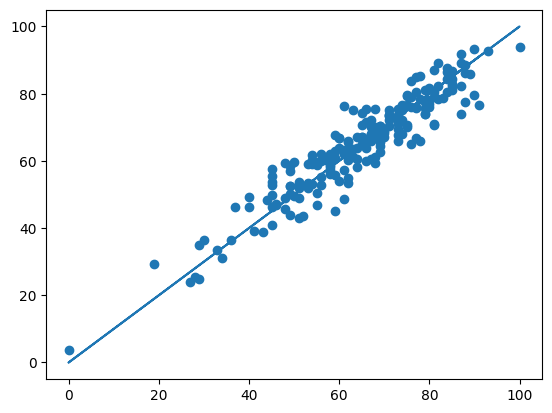

In [28]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test)

Text(0.5, 0, 'Actual values')

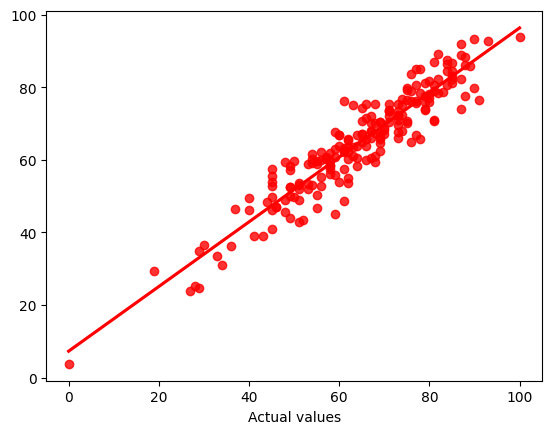

In [30]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')
plt.xlabel('Actual values')